In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

In [329]:
insu = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
insu.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


**Problem Statement:**

    Business case:
    Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.


## EDA.

As we can see in above dataframe that there are some '?' symbol present in our dataset, so replacing the unwanted '?' symbol with null values.

In [330]:
insu.replace('?', np.nan,inplace = True)

In [331]:
insu.shape

(1000, 40)

Shape of our dataset is (1000,40)

In [332]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**Information About the Dataset.**
- RangeIndex: 0 to 999
- Total columns: 40
- dtypes: float64(2), int64(17), object(21)

In [333]:
insu.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


**Short description of our dataset, this will give us the short summary of dataset**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

In [149]:
insu.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are null values present in our dataset.

## Data Cleaning.

**Filling Null Values & Dropping Column with Complete Null Values..**

In [341]:
insu['collision_type'] = insu['collision_type'].fillna(insu['collision_type'].mode()[0])
insu['property_damage'] = insu['property_damage'].fillna(insu['property_damage'].mode()[0])
insu['police_report_available'] = insu['police_report_available'].fillna(insu['police_report_available'].mode()[0])
insu.drop('_c39',axis = 1,inplace = True)

In [342]:
insu.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now, No Null Values present in our Dataset.

## Visualization.

**- Bivariate Analysis.**

In [152]:
def scatter(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=insu)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between policy_annual_premium and auto_make


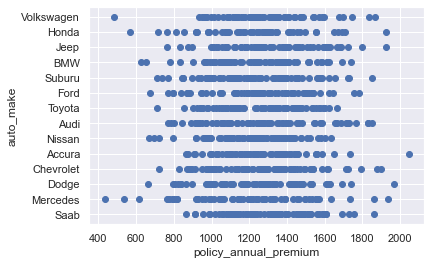

In [153]:
scatter(x = 'policy_annual_premium',y = 'auto_make', data = insu)

Scatterpot between policy_annual_premium and total_claim_amount


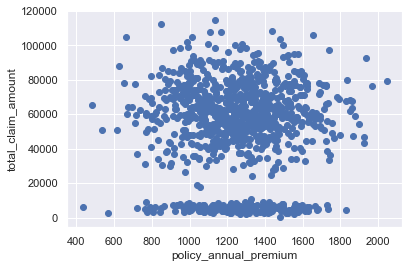

In [334]:
scatter(x = 'policy_annual_premium',y = 'total_claim_amount', data = insu)

Scatterpot between policy_annual_premium and umbrella_limit


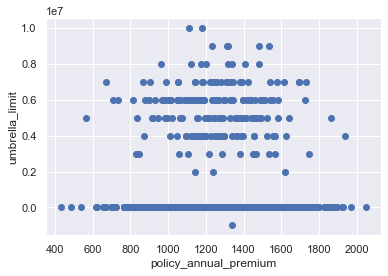

In [353]:
scatter(x = 'policy_annual_premium',y = 'umbrella_limit', data = insu)

Scatterpot between police_report_available and vehicle_claim


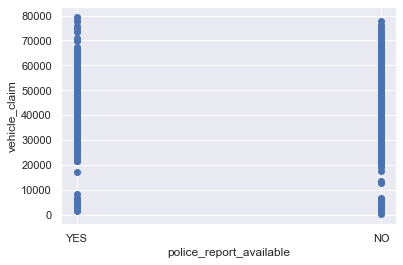

In [154]:
scatter(x = 'police_report_available',y = 'vehicle_claim', data = insu)

**- Univariate Analysis.**

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

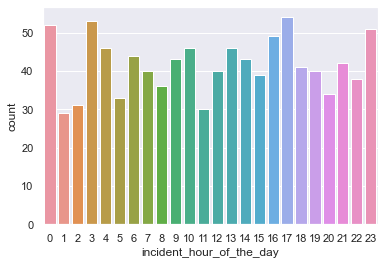

In [335]:
sns.countplot(insu['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

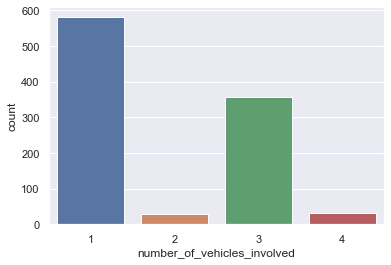

In [336]:
sns.countplot(insu['number_of_vehicles_involved'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

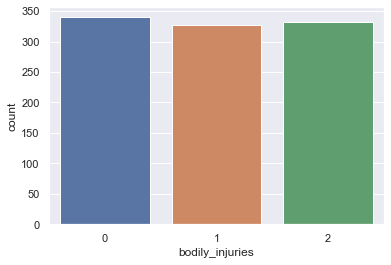

In [337]:
sns.countplot(insu['bodily_injuries'])

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

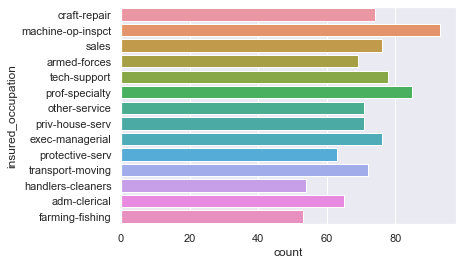

In [339]:
sns.countplot(y = insu['insured_occupation'])

**- Dropping Unwanted Columns.**

In [343]:
insu.drop(columns = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year'],axis = 1, inplace = True)

In [344]:
insu.shape

(1000, 27)

## Encoding.

In [346]:
en = ['insured_sex','policy_csl','insured_education_level','insured_occupation','insured_relationship',
      'incident_type','collision_type','incident_severity','authorities_contacted','property_damage',
      'police_report_available','fraud_reported']

In [347]:
for i in en:
    print('\n',i)
    print(insu[i].unique(),'\n ----------------------------------------')


 insured_sex
['MALE' 'FEMALE'] 
 ----------------------------------------

 policy_csl
['250/500' '100/300' '500/1000'] 
 ----------------------------------------

 insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD'] 
 ----------------------------------------

 insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing'] 
 ----------------------------------------

 insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family'] 
 ----------------------------------------

 incident_type
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car'] 
 ----------------------------------------

 collision_type
['Side Collision' 'Rear Collision' 'Front Collision'] 
 ----------------------------------------

 

So, This is the uniquie values present in every object type column.

**- Applying get_dummies.**

In [348]:
gd = pd.get_dummies(insu[['policy_csl','collision_type','incident_severity']])
insu = pd.concat([insu,gd],axis = 1)
insu.drop(columns = ['policy_csl','collision_type','incident_severity'],axis = 1,inplace = True)
insu.shape

(1000, 34)

**- LabelEncoder.**

In [349]:
lb = LabelEncoder()
insu['insured_sex'] = lb.fit_transform(insu['insured_sex'])
insu['insured_education_level'] = lb.fit_transform(insu['insured_education_level'])
insu['insured_occupation'] = lb.fit_transform(insu['insured_occupation'])
insu['insured_relationship'] = lb.fit_transform(insu['insured_relationship'])
insu['authorities_contacted'] = lb.fit_transform(insu['authorities_contacted'])
insu['property_damage'] = lb.fit_transform(insu['property_damage'])
insu['police_report_available'] = lb.fit_transform(insu['police_report_available'])
insu['fraud_reported'] = lb.fit_transform(insu['fraud_reported'])

**- Replacing Values.**

In [350]:
insu['incident_type'] = insu['incident_type'].replace('Parked Car',0)
insu['incident_type'] = insu['incident_type'].replace('Single Vehicle Collision',1)
insu['incident_type'] = insu['incident_type'].replace('Vehicle Theft',2)
insu['incident_type'] = insu['incident_type'].replace('Multi-vehicle Collision',3)

In [352]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   months_as_customer                1000 non-null   int64  
 1   age                               1000 non-null   int64  
 2   policy_deductable                 1000 non-null   int64  
 3   policy_annual_premium             1000 non-null   float64
 4   umbrella_limit                    1000 non-null   int64  
 5   insured_sex                       1000 non-null   int64  
 6   insured_education_level           1000 non-null   int64  
 7   insured_occupation                1000 non-null   int64  
 8   insured_relationship              1000 non-null   int64  
 9   capital-gains                     1000 non-null   int64  
 10  capital-loss                      1000 non-null   int64  
 11  incident_type                     1000 non-null   int64  
 12  authori

Now, dtypes: float64(1), int64(23), uint8(10)

## Normal Distribution.

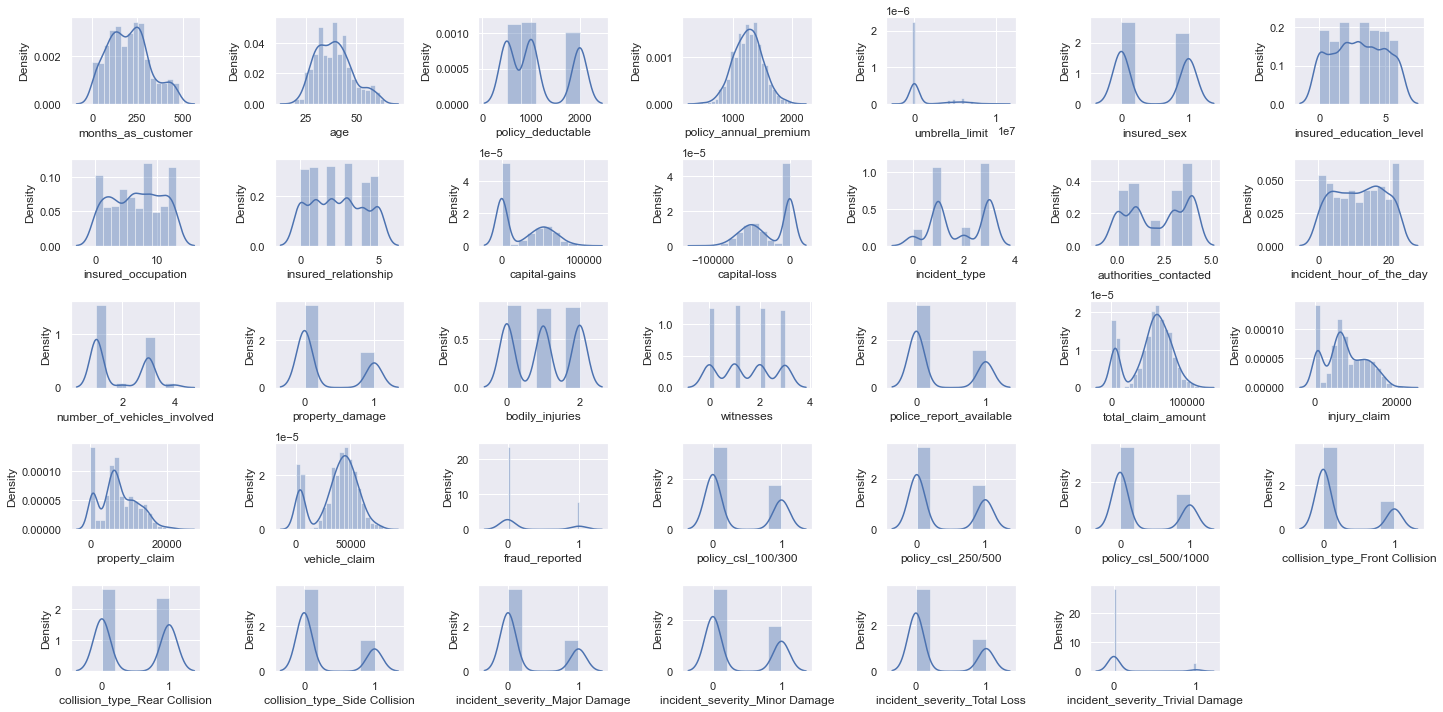

In [354]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in insu:
    if plotnumber <= 35:
        ax = plt.subplot(5,7,plotnumber)
        sns.distplot(insu[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

Dataset is close to Normal Distribution.

## Outliers.

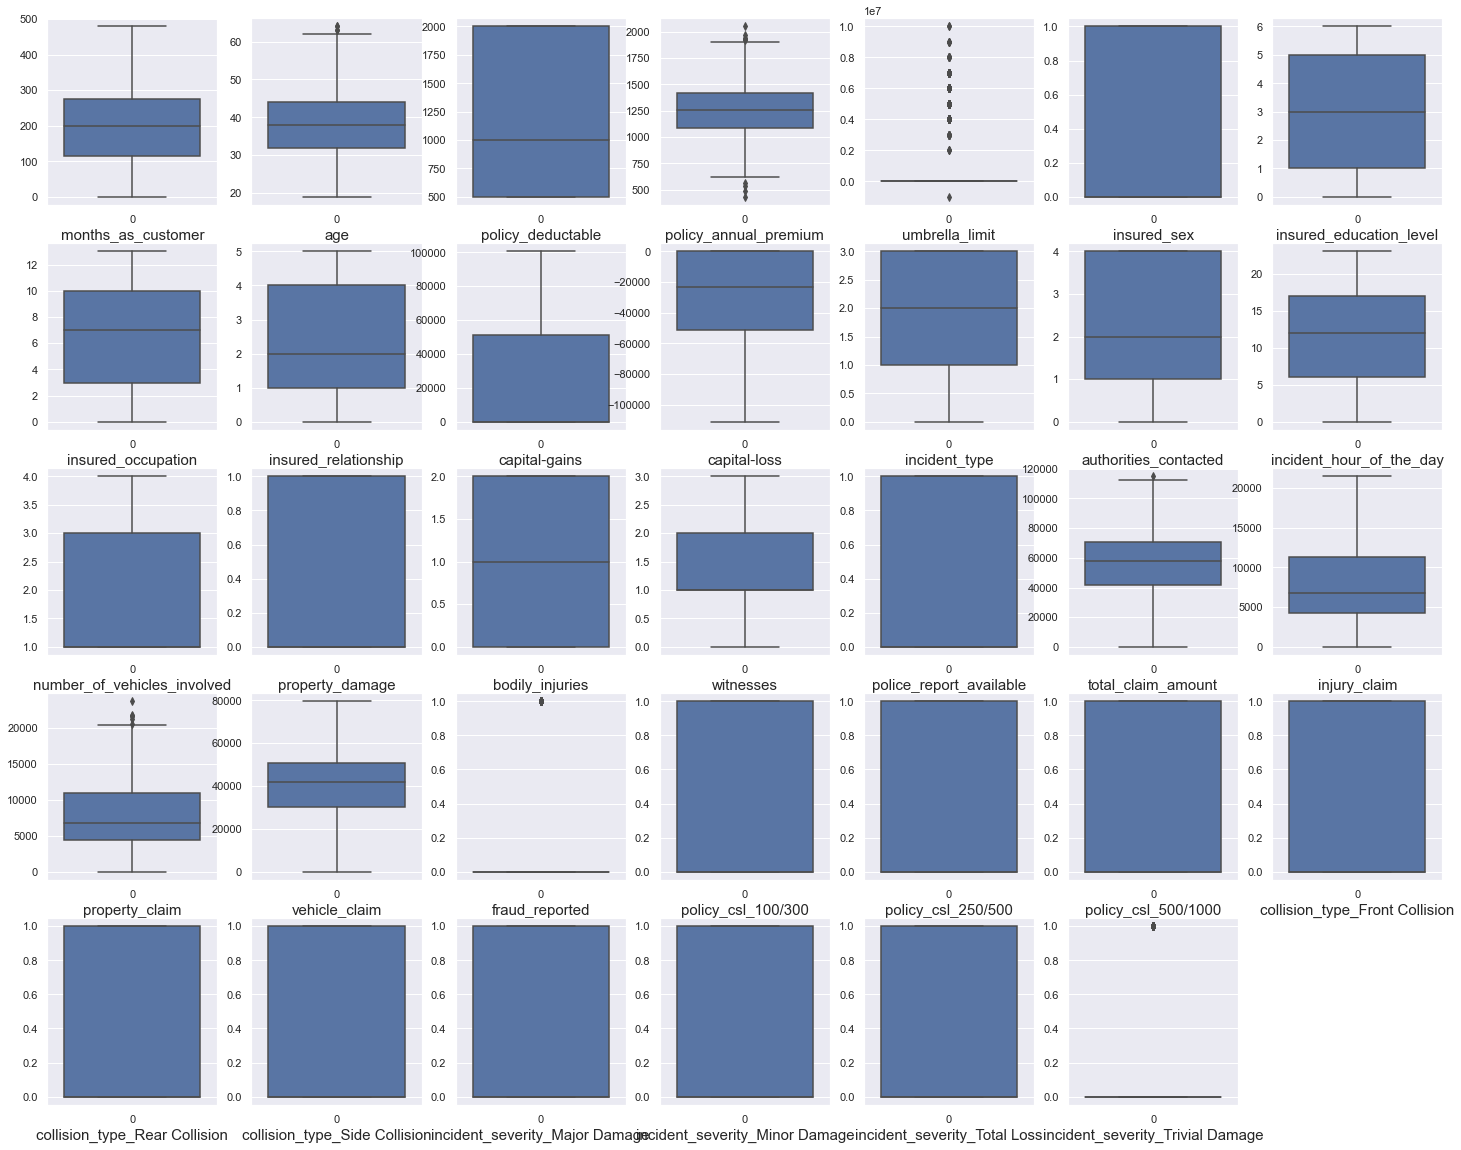

In [355]:
plt.figure(figsize = (25,20))
graph = 1
for column in insu:
    if graph <= 35:
        plt.subplot(5,7,graph)
        ax = sns.boxplot(data = insu[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Only few outliers are present in our dataset, we can scaled them futher.

## Correlation.

In [356]:
df = insu.corr()
msk = np.triu(np.ones_like(df))

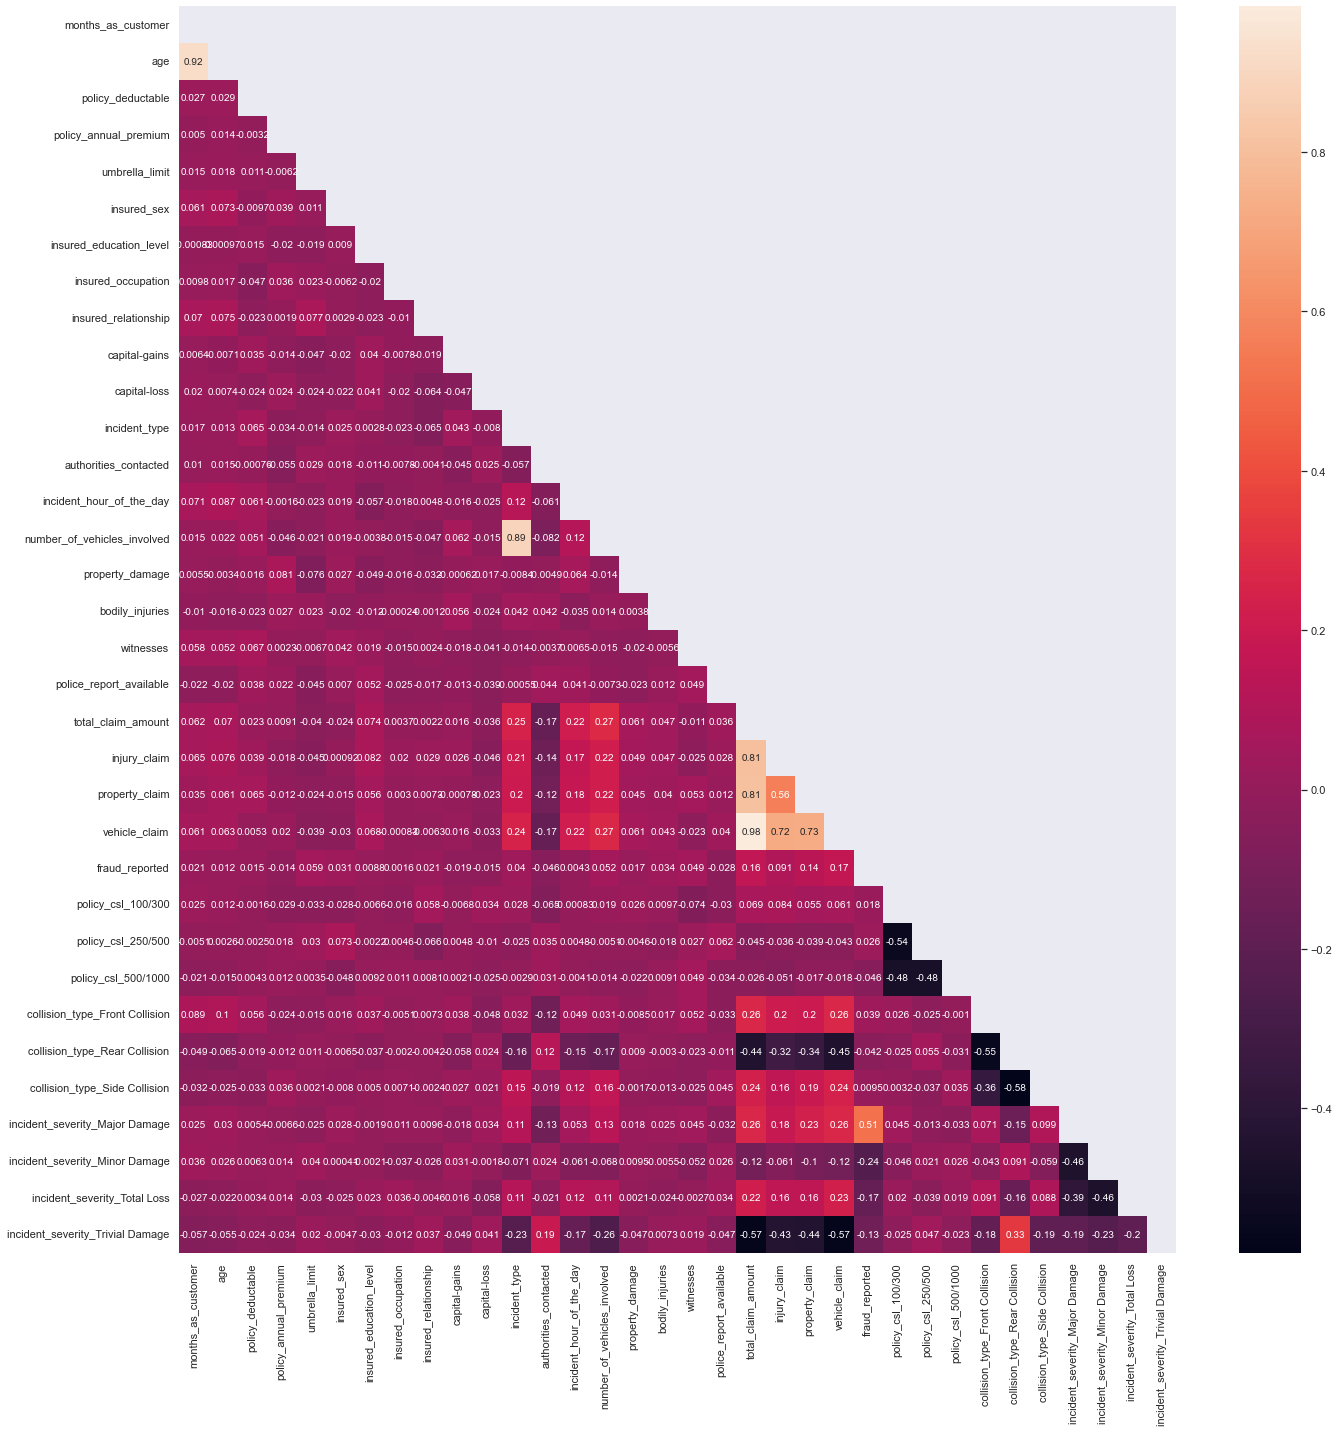

In [357]:
plt.figure(figsize = (20,20))
sns.heatmap(df,annot = True,mask = msk)
plt.tight_layout()

Found that : 
1. age and months_as_customer are correlated with each other.
2. total_claim_amount and vehicle_claim are correlated columns.
   
   We are taking the correlation whoes correlation is greater then 90%, So dropping any of the columns which are correlated.

In [358]:
insu.drop(columns = ['age','total_claim_amount'],axis = 1, inplace = True)

## Features Selection

**- Seperating Features & Target Columns.**

In [359]:
x = insu.drop('fraud_reported',axis = 1)
y = insu.fraud_reported

**- Applying SelectKBest & F_classif for features selection.**

In [360]:
best_feature = SelectKBest(score_func = f_classif, k =30)
fit = best_feature.fit(x,y)

In [361]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [362]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(30,'Scores')

,Feature Name,Scores
27,incident_severity_Major Damage,355.765552
28,incident_severity_Minor Damage,60.845234
29,incident_severity_Total Loss,30.151126
20,vehicle_claim,29.718214
19,property_claim,19.327729
30,incident_severity_Trivial Damage,17.561740
18,injury_claim,8.328776
3,umbrella_limit,3.441452
13,number_of_vehicles_involved,2.689100
16,witnesses,2.451026


Features and Score.

**- Graph of correlation with Target Column.**

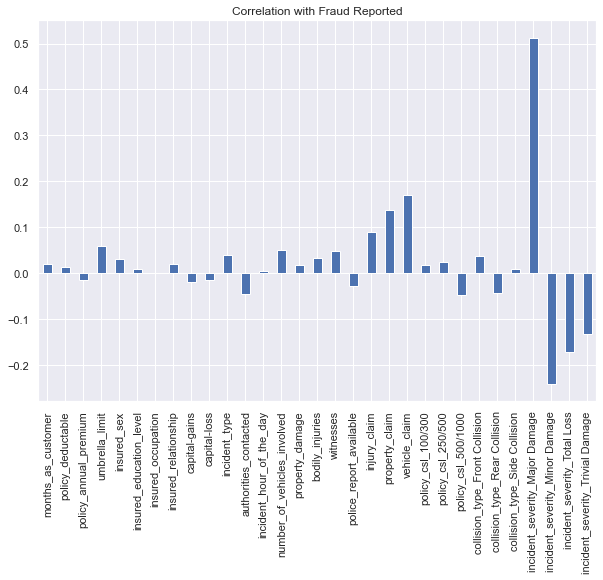

In [363]:
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Fraud Reported')
plt.show()

1. Taking top 16 columns according to the score and graph
2. Also taking columns whose score is greater than 1.

**- Top Best Features.**

In [364]:
xbest = x[['incident_severity_Major Damage','incident_severity_Minor Damage','incident_severity_Total Loss',
          'vehicle_claim','property_claim','incident_severity_Trivial Damage','injury_claim','umbrella_limit',
          'number_of_vehicles_involved','witnesses','policy_csl_500/1000','authorities_contacted',
          'collision_type_Rear Collision','incident_type','collision_type_Front Collision','bodily_injuries']]

In [365]:
xbest

,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,vehicle_claim,property_claim,incident_severity_Trivial Damage,injury_claim,umbrella_limit,number_of_vehicles_involved,witnesses,policy_csl_500/1000,authorities_contacted,collision_type_Rear Collision,incident_type,collision_type_Front Collision,bodily_injuries
0,1,0,0,52080,13020,0,6510,0,1,2,0,4,0,1,0,1
1,0,1,0,3510,780,0,780,5000000,1,0,0,4,1,2,0,0
2,0,1,0,23100,3850,0,7700,5000000,3,3,0,4,1,3,0,2
3,1,0,0,50720,6340,0,6340,6000000,1,2,0,4,0,1,1,1
4,0,1,0,4550,650,0,1300,6000000,1,1,1,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,61040,8720,0,17440,0,1,1,1,1,0,1,1,0
996,1,0,0,72320,18080,0,18080,0,1,3,0,1,1,1,0,2
997,0,1,0,52500,7500,0,7500,3000000,3,3,0,4,0,3,0,2
998,1,0,0,36540,5220,0,5220,5000000,1,1,1,3,1,1,0,0


Final Dataset.

## Model Building.

**- Scaling the dataset: Standard Scaler.**

In [366]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(xbest)

**- Train Test Split.**

In [367]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 90)

**- Function for Training & Testing.**

In [303]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 

**- Model Instantiating.**

In [277]:
ada = AdaBoostClassifier()
xgb = XGBClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

**- AdaBoost Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.83

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       607
           1       0.68      0.56      0.62       193

    accuracy                           0.83       800
   macro avg       0.77      0.74      0.75       800
weighted avg       0.82      0.83      0.82       800


 ----- Confusion matrix ----- 
 [[555  52]
 [ 84 109]]

 ----- Test Result ----- 

Accuracy Score: 0.745

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.54      0.35      0.43        54

    accuracy                           0.74       200
   macro avg       0.67      0.62      0.63       200
weighted avg       0.72      0.74      0.73       200


 ----- Confusion matrix ----- 
 [[130  16]
 [ 35  19]]

 ----- Roc Curve ----- 



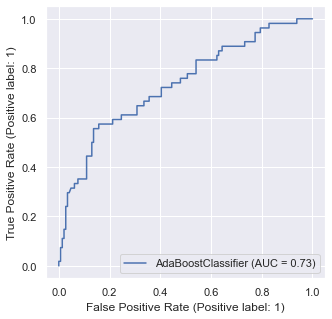

In [304]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- XGB Classifier.**


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       193

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


 ----- Confusion matrix ----- 
 [[607   0]
 [  0 193]]

 ----- Test Result ----- 

Accuracy Score: 0.74

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.53      0.30      0.38        54

    accuracy                           0.74       200
   macro avg       0.65      0.60      0.61       200
weighted avg       0.71      0.74      0.71       200


 ----- Confusion matrix ----- 
 [[132  14]
 [ 38  16]]

 ----- Roc Curve ----- 



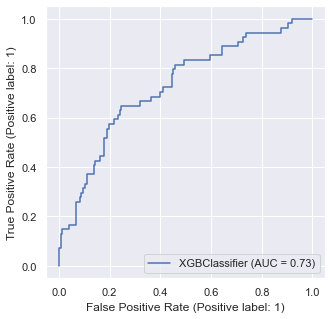

In [305]:
xgb.fit(x_train,y_train)
score(xgb, x_train,x_test,y_train,y_test,train = True)
score(xgb, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.91875

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       607
           1       0.89      0.76      0.82       193

    accuracy                           0.92       800
   macro avg       0.91      0.87      0.88       800
weighted avg       0.92      0.92      0.92       800


 ----- Confusion matrix ----- 
 [[588  19]
 [ 46 147]]

 ----- Test Result ----- 

Accuracy Score: 0.735

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       146
           1       0.51      0.37      0.43        54

    accuracy                           0.73       200
   macro avg       0.65      0.62      0.63       200
weighted avg       0.71      0.73      0.72       200


 ----- Confusion matrix ----- 
 [[127  19]
 [ 34  20]]

 ----- Roc Curve ----- 



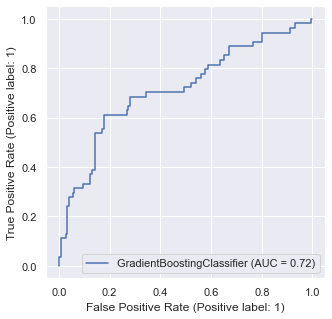

In [306]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.84875

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       607
           1       0.72      0.60      0.66       193

    accuracy                           0.85       800
   macro avg       0.80      0.76      0.78       800
weighted avg       0.84      0.85      0.84       800


 ----- Confusion matrix ----- 
 [[563  44]
 [ 77 116]]

 ----- Test Result ----- 

Accuracy Score: 0.77

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       146
           1       0.62      0.37      0.47        54

    accuracy                           0.77       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.75      0.77      0.75       200


 ----- Confusion matrix ----- 
 [[134  12]
 [ 34  20]]

 ----- Roc Curve ----- 



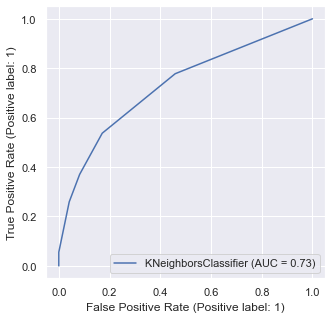

In [307]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Classifier.**


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       193

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


 ----- Confusion matrix ----- 
 [[607   0]
 [  0 193]]

 ----- Test Result ----- 

Accuracy Score: 0.775

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.63      0.41      0.49        54

    accuracy                           0.78       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.76      0.78      0.76       200


 ----- Confusion matrix ----- 
 [[133  13]
 [ 32  22]]

 ----- Roc Curve ----- 



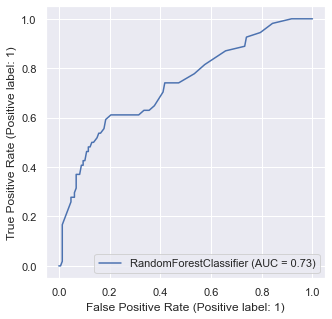

In [308]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- Original & Predicted from RandomForest.**

In [322]:
a_rfc = np.array(y_test)
predicted_rfc = np.array(rf.predict(x_test))
df_rfc = pd.DataFrame({'Original':a_rfc,'Predicted':predicted_rfc})
df_rfc

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
195,0,0
196,0,1
197,0,0
198,0,0


    As, RandomForest Classifier is giving the best accuracy score among all the models, So that it as a best 
    model.

## Cross-Validation.

In [310]:
k_f = KFold(n_splits = 5,shuffle = True)
k_f

KFold(n_splits=5, random_state=None, shuffle=True)

In [321]:
for train,test in k_f.split(insu):
    print('Train:',train,'\ntest:',test)

Train: [  2   3   4   5   6   7   8   9  10  12  13  14  15  16  18  19  22  23
  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42
  44  46  47  48  50  51  53  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  76  78  80  83  84  85  86  87  88  90  91
  92  93  94  95  96  97  98  99 100 101 102 106 107 108 110 111 112 113
 114 115 117 118 120 121 122 124 125 126 129 130 131 132 135 136 137 138
 139 140 141 142 143 144 145 146 147 150 151 152 153 155 156 157 158 159
 160 161 162 163 164 165 166 168 170 171 173 174 175 177 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 198 199 201 202
 203 204 206 208 209 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 227 228 231 232 233 235 236 237 238 239 240 241 243 244 245 246
 249 250 251 252 253 254 255 256 257 258 259 261 263 264 265 266 269 270
 271 274 275 276 277 278 280 281 282 283 284 285 286 287 288 289 290 293
 294 295 296 297 298 299 300 301 302 303 306

In [318]:
cross_val_score(rf,x_scaled,y,cv = 5).mean()

0.78

Our cross validation score and model's accuracy score is alomost equal, so we can consider that our model isn't overfitting/underfitting.

## Hyperparameter Tunning.

In [284]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [290]:
param = {'n_estimators':range(0,100,10),
         'ccp_alpha':[0.0,0.2,0.4,0.5,0.7,0.8,1.0],
         'criterion':["gini", "entropy"],
         'max_features':["sqrt", "log2", None],
         }

In [291]:
grid = GridSearchCV(rf,param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 70}


In [292]:
rf_hyp = RandomForestClassifier(ccp_alpha = 0.0, criterion = 'gini', max_features = 'sqrt', n_estimators = 70)

In [294]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       193

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


 ----- Confusion matrix ----- 
 [[607   0]
 [  0 193]]

 ----- Test Result ----- 

Accuracy Score: 0.76

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.58      0.39      0.47        54

    accuracy                           0.76       200
   macro avg       0.69      0.64      0.66       200
weighted avg       0.74      0.76      0.74       200


 ----- Confusion matrix ----- 
 [[131  15]
 [ 33  21]]


    Post tuning result are not better then post tunning, So taking default parameters only.

**Saving the Model.**

In [370]:
filename = 'insurance.pickle'
pickle.dump(rf, open(filename, 'wb'))